# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [3]:


data = pd.read_csv('weight-height.csv')
male_df =  data[data["Gender"] == "Male"]
#male_df = male_df.mean()
female_df =  data[data["Gender"] == "Female"]
male_df.Height
print(female_df.Weight.mean())
print(female_df.Weight.std())
#male_df.Weight
#data
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

135.86009300746835
19.022467805319028


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


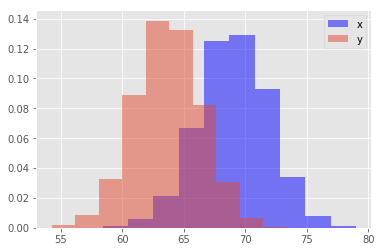

In [4]:
from matplotlib import pyplot

x = male_df.Height
y = female_df.Height
bins = 10

pyplot.hist(x, bins, alpha=0.5, label='x', color ='Blue', normed = True)
pyplot.hist(y, bins, alpha=0.5, label='y', normed = True)
pyplot.legend(loc = 'upper right')
pyplot.show()

In [5]:
# Record your observations - are these inline with your personal observations?
##LIT


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

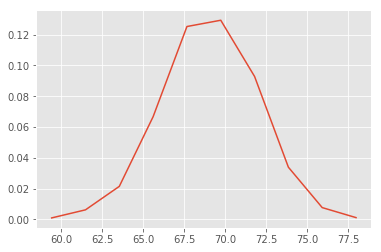

In [6]:
import numpy as np
n, bins = np.histogram(male_df.Height, 10, density=1)
n , bins

# Initialize numpy arrays according to number of bins with zeros to store interpolated values
pdfx = np.zeros(n.size)
pdfy = np.zeros(n.size)

# Interpolate through histogram bins 
# identify middle point between two neighbouring bins, in terms of x and y coords
for k in range(n.size):
    pdfx[k] = 0.5*(bins[k]+bins[k+1])
    pdfy[k] = n[k]

# plot the calculated curve
plt.plot(pdfx, pdfy)


In [7]:
n, bins = np.histogram(x, 10, density = 1)
print(n)
print(bins)
n.size

[0.00097126 0.00621606 0.02146482 0.06672547 0.12529236 0.12937165
 0.09285233 0.03389693 0.00767294 0.00116551]
[58.40690493 60.46608867 62.52527241 64.58445616 66.6436399  68.70282364
 70.76200738 72.82119112 74.88037486 76.9395586  78.99874235]


10

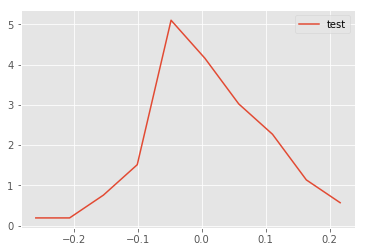

In [8]:
def density(x):
    n, bins = np.histogram(x, 10, density = 1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

# Interpolate through histogram bins 
# identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
# plot the calculated curve
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


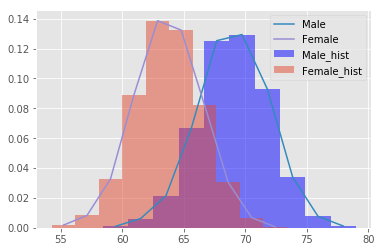

In [9]:
# You code here 
from matplotlib import pyplot

x = male_df.Height
y = female_df.Height
bins = 10

pyplot.hist(x, bins, alpha=0.5, label='Male_hist', color ='Blue', normed = True)
pyplot.hist(y, bins, alpha=0.5, label='Female_hist', normed = True)
pyplot.legend(loc = 'upper right')

x,y = density(male_df.Height)
plt.plot(x,y, label = 'Male')
plt.legend()


x,y = density(female_df.Height)
plt.plot(x,y, label = 'Female')
plt.legend()

#### Repeat above exerice for male and female weights

/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


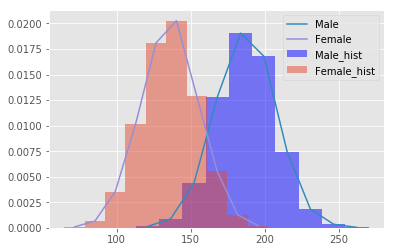

In [10]:
from matplotlib import pyplot

x = male_df.Weight
y = female_df.Weight
bins = 10

pyplot.hist(x, bins, alpha=0.5, label='Male_hist', color ='Blue', normed = True)
pyplot.hist(y, bins, alpha=0.5, label='Female_hist', normed = True)
pyplot.legend(loc = 'upper right')


x,y = density(male_df.Weight)
plt.plot(x,y, label = 'Male')
plt.legend()


x,y = density(female_df.Weight)
plt.plot(x,y, label = 'Female')
plt.legend()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


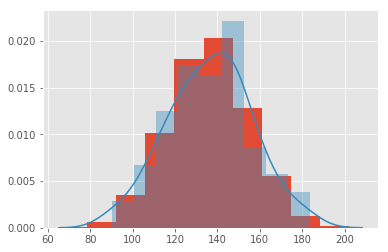

In [11]:
plt.hist(female_df.Weight, bins =10, density = True)

import seaborn as sns
s1 = list(np.random.normal(female_df.Weight.mean(), female_df.Weight.std(), 100))
sns.distplot(s1)

#### Write your observations in the cell below.

In [12]:
# Record your observations - are these inline with your personal observations?


# So whats the takeaway when comparing male and female heights and weights 



#### Repeat Above experiments in seaborn and compare with your results. 

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


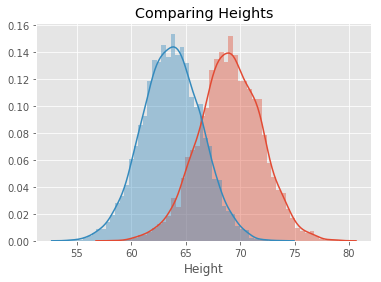

In [13]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


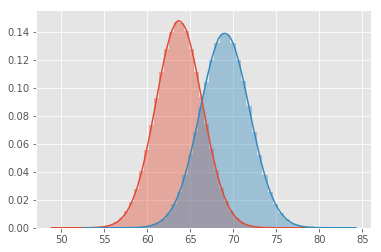

In [14]:
s1 = list(np.random.normal(female_df.Height.mean(), female_df.Height.std(), 10000000))
s2 = list(np.random.normal(male_df.Height.mean(), male_df.Height.std(), 10000000))
sns.distplot(s1)
sns.distplot(s2)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


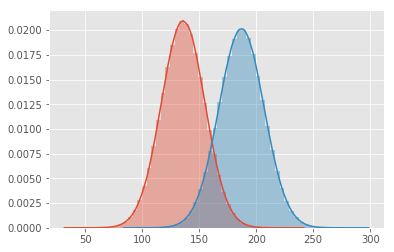

In [15]:
s1 = list(np.random.normal(female_df.Weight.mean(), female_df.Weight.std(), 10000000))
s2 = list(np.random.normal(male_df.Weight.mean(), male_df.Weight.std(), 10000000))
sns.distplot(s1)
sns.distplot(s2)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


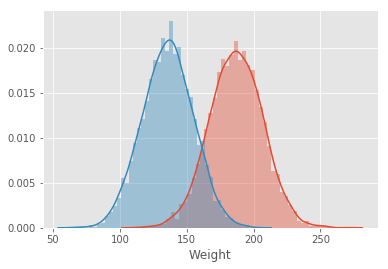

In [18]:
import seaborn as sns
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)

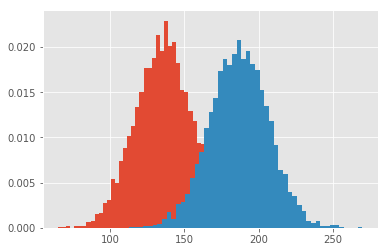

In [19]:
plt.hist(female_df.Weight, bins =50, density = True)
plt.hist(male_df.Weight, bins =50, density = True)


import seaborn as sns
#sns.distplot(s1)

Text(0.5,1,'Comparing Weights')

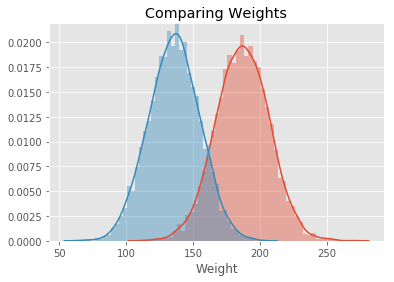

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.